In [20]:
from qdrant_client import QdrantClient, models
from fastembed import TextEmbedding
from PIL import Image
from IPython.display import display
import uuid

In [8]:
client = QdrantClient(url="http://localhost:6333")

In [9]:
text_model_name = "Qdrant/clip-ViT-B-32-text"
image_model_name = "Qdrant/clip-ViT-B-32-vision"

collection_name = f"professional_collection_{uuid.uuid4()}"

client.create_collection(
    collection_name=collection_name,
    vectors_config=models.VectorParams(
        size=client.get_embedding_size(text_model_name), 
        distance=models.Distance.COSINE
    )
)

collection_name

'professional_collection_fefd3574-b33e-4b0c-b145-3ed5c7d3b12d'

In [10]:
images = [
    { "path": "./images/curated/artist_image_123.jpg" },
    { "path": "./images/curated/astronaut_image_115.jpg" },
    { "path": "./images/curated/astronaut_image_14.jpg" },
    { "path": "./images/curated/athlete_image_1.jpg" },
    { "path": "./images/curated/chef_image_107.jpg" },
    { "path": "./images/curated/chef_image_10.jpg" },
    { "path": "./images/curated/chef_image_131.jpg" },
    { "path": "./images/curated/construction_worker_image_107.jpg" },
    { "path": "./images/curated/doctor_image_119.jpg" },
    { "path": "./images/curated/doctor_image_126.jpg" },
]

image_embeddings = [models.Image(image=image["path"], model=image_model_name) for image in images]

In [11]:
client.upload_collection(
    collection_name=collection_name,
    vectors=image_embeddings,
    payload=images,
)

In [14]:
model = TextEmbedding(model_name=text_model_name)
def query_embedding(text: str):
    return list(model.embed(text))[0]

0.24029979


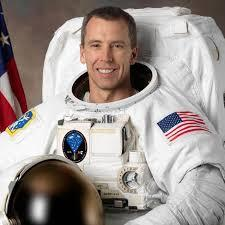


0.23552175


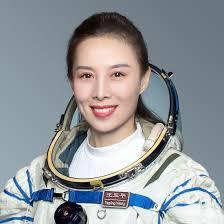


0.1992652


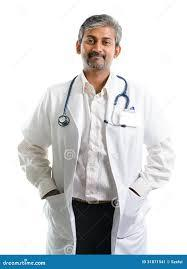

In [29]:
query_text = "space"

search_result = client.query_points(
    collection_name=collection_name,
    query=query_embedding(query_text),
    with_payload=True,
    limit=3
).points

for entry in search_result:
    print(entry.score)
    display(Image.open(entry.payload['path']))
    print()